In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="color:yellow">Data Load: Load the dataset into a dataframe</h1>

In [2]:
df1 = pd.read_csv("diabetes.csv")
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<p>→ No any null values found</p>

In [4]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df1.shape

(768, 9)

<h1 style="color:yellow">Data Exploration & Cleaning</h1>

### • Pregnancies vs Outcome

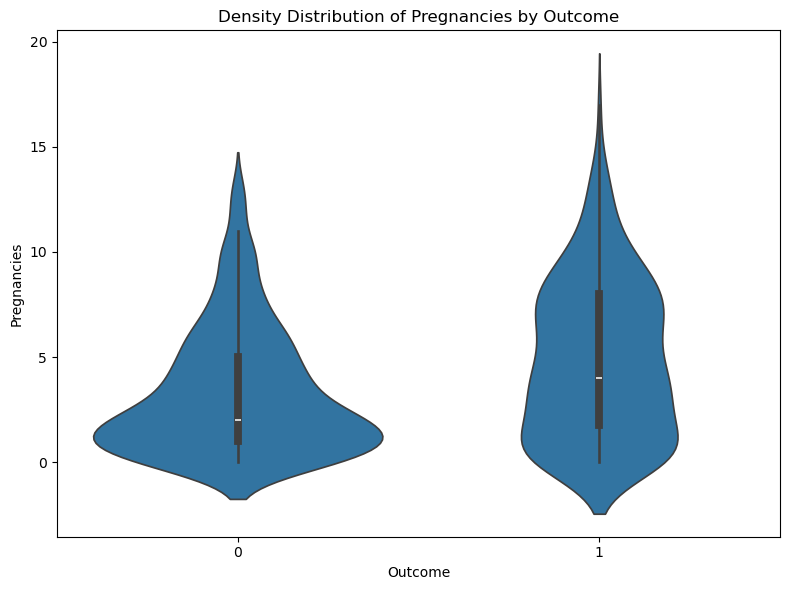

In [7]:
plt.figure(figsize=(8, 6))

sns.violinplot(x="Outcome", y="Pregnancies", data=df1)
plt.title("Density Distribution of Pregnancies by Outcome")

plt.tight_layout()
plt.show()

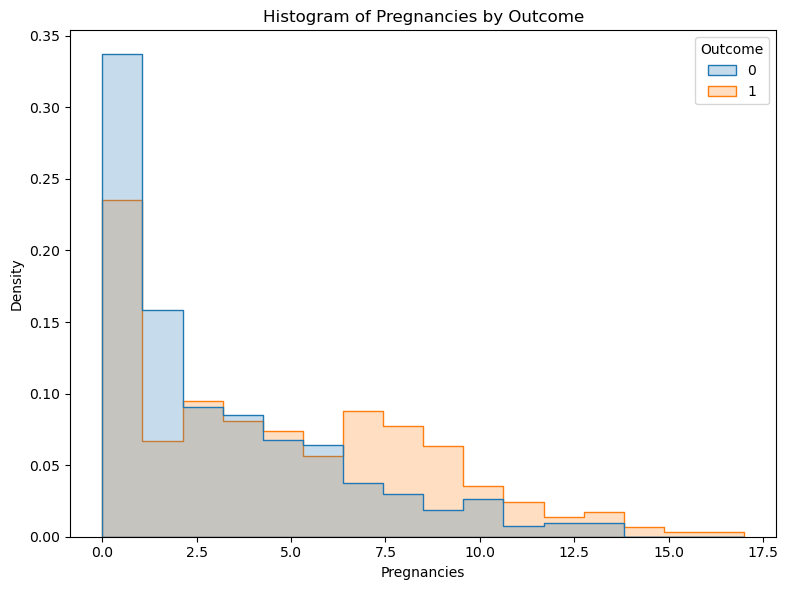

In [8]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df1, x="Pregnancies", hue="Outcome", element="step", stat="density", common_norm=False)

plt.title("Histogram of Pregnancies by Outcome")
plt.tight_layout()
plt.show()

<p>→ <b>There is a positive correlation between the number of pregnancies and being positive for diabetes.</b> As the number of pregnancies increases, the risk of testing positive for diabetes (Outcome 1) appears to increase.</p>

### • Glucose vs Outcome

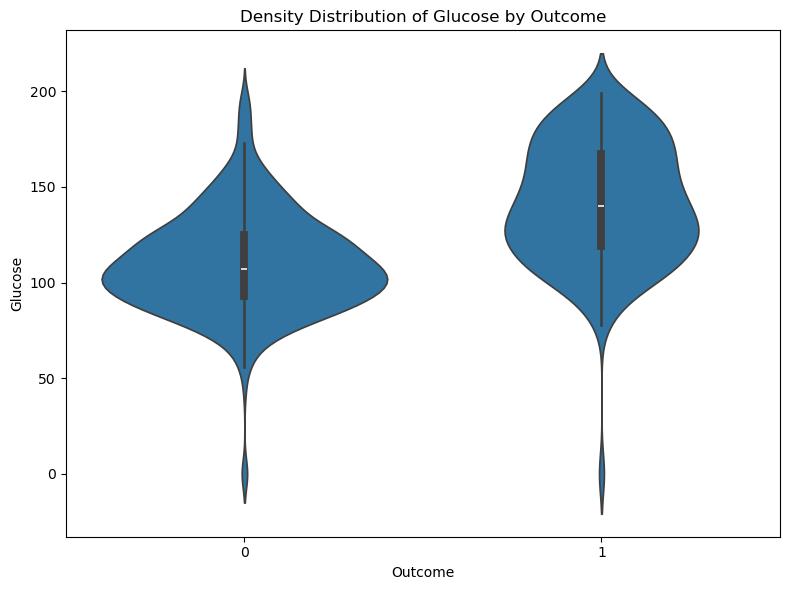

In [9]:
plt.figure(figsize=(8, 6))

sns.violinplot(x="Outcome", y="Glucose", data=df1)
plt.title("Density Distribution of Glucose by Outcome")

plt.tight_layout()
plt.show()

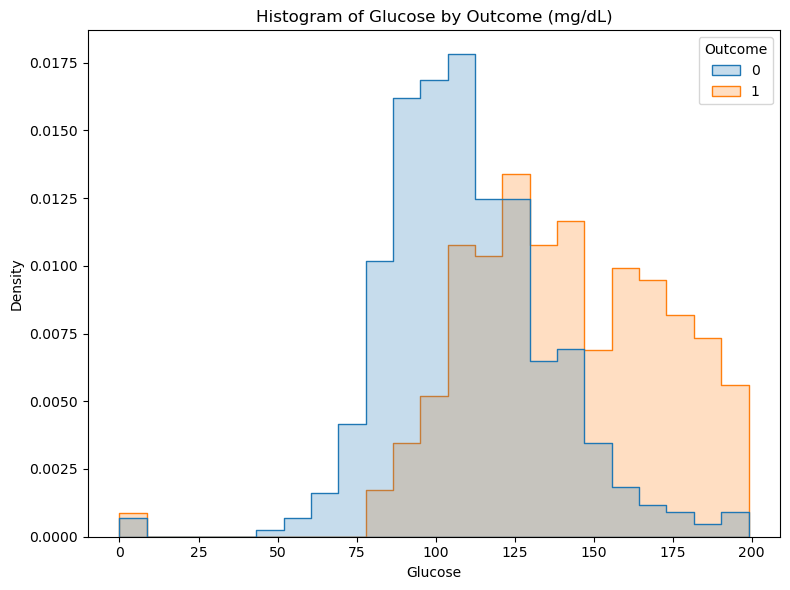

In [10]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df1, x="Glucose", hue="Outcome", element="step", stat="density", common_norm=False)

plt.title("Histogram of Glucose by Outcome (mg/dL)")
plt.tight_layout()
plt.show()

<p>→ <b>There is a positive correlation between the level of Glucose and being positive for diabetes.</b>. As the level of Glucose increases, the risk of testing positive for diabetes (Outcome 1) appears to increase. <br>
→ Also, it can be noticed that there are 0 level Glucose is present in the dataset. Biologically, a Glucose level of 0 is impossible.<br>
→ Those 0 values will be replaced by the median of each resposible Outcome results.</p>

In [11]:
# Step 1:
#    → Replace 0 with NaN (Not a Number) in the Glucose column.
#    → This tells pandas to ignore these values during calculation
df1['Glucose'] = df1['Glucose'].replace(0, np.nan)

# Step 2:
#    → Group by 'outcome' and calculate the median
#    → Pandas automatically ignore the NaN when calculating the median
median_values_Glucose = df1.groupby('Outcome')['Glucose'].median()

print(median_values_Glucose)

Outcome
0    107.0
1    140.0
Name: Glucose, dtype: float64


In [12]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     5
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df1['Glucose'] = df1['Glucose'].fillna(df1.groupby('Outcome')['Glucose'].transform('median'))

In [14]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

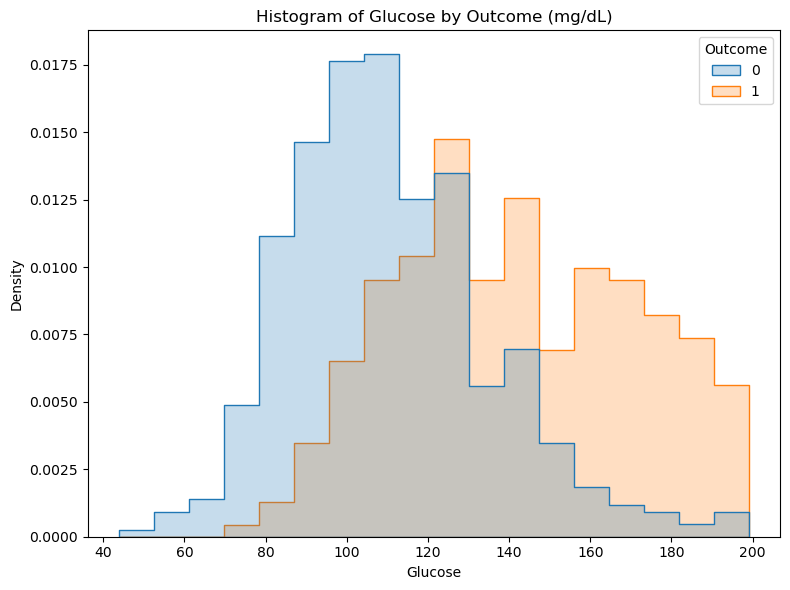

In [15]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df1, x="Glucose", hue="Outcome", element="step", stat="density", common_norm=False)

plt.title("Histogram of Glucose by Outcome (mg/dL)")
plt.tight_layout()
plt.show()

<p>
    → It can be observed that there are no any 0 values present in the column. 
</p>

### • Blood Pressure vs Outcome

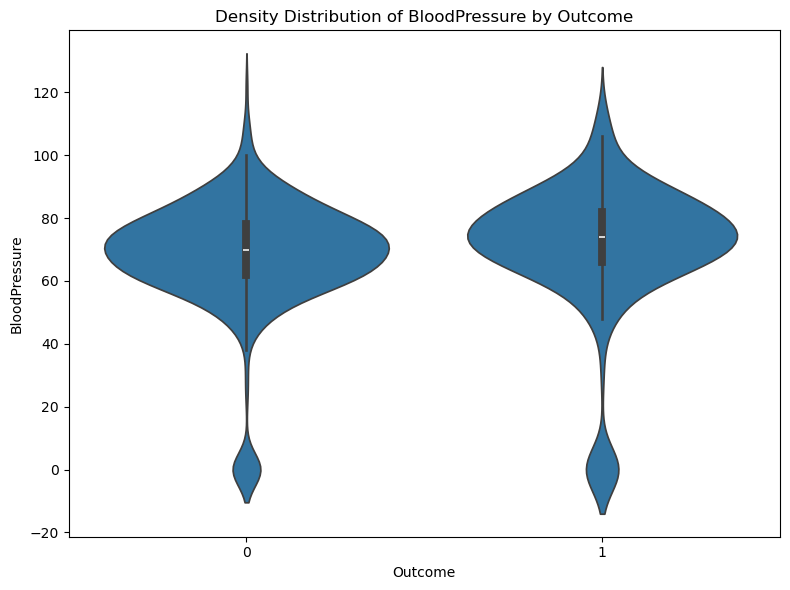

In [16]:
plt.figure(figsize=(8, 6))

sns.violinplot(x="Outcome", y="BloodPressure", data=df1)
plt.title("Density Distribution of BloodPressure by Outcome")

plt.tight_layout()
plt.show()

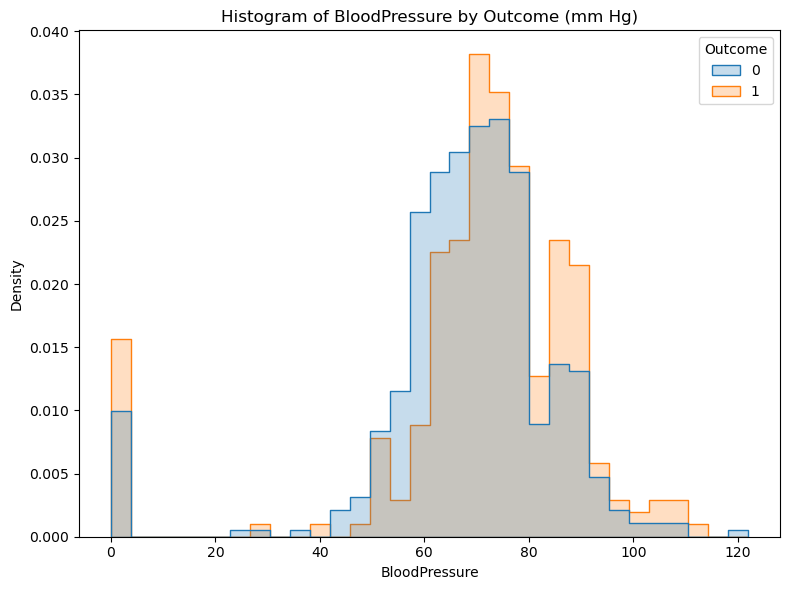

In [17]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df1, x="BloodPressure", hue="Outcome", element="step", stat="density", common_norm=False)

plt.title("Histogram of BloodPressure by Outcome (mm Hg)")
plt.tight_layout()
plt.show()

In [18]:
df1['BloodPressure'] = df1['BloodPressure'].replace(0, np.nan)

median_values_BloodPressure = df1.groupby('Outcome')['BloodPressure'].median()

print(median_values_BloodPressure)

Outcome
0    70.0
1    74.5
Name: BloodPressure, dtype: float64


<p>→ <b>There is a positive correlation between the variables. </b>It can be seen that there are women with diabetic more likely to have high blood pressure compared to the non-diabetic women. Although the difference is not significant, it can be used to train the model. <br>
→ Also, it can be observed that there are 0 values present in the BloodPressure column. Biologically, a blood pressure of 0 level impossible for living person. Same procedure, which is implenmented to the Glucose column will be implemented.</p>

In [19]:
df1.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure               35
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [20]:
df1['BloodPressure'] = df1['BloodPressure'].fillna(df1.groupby('Outcome')['BloodPressure'].transform('median'))

In [21]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

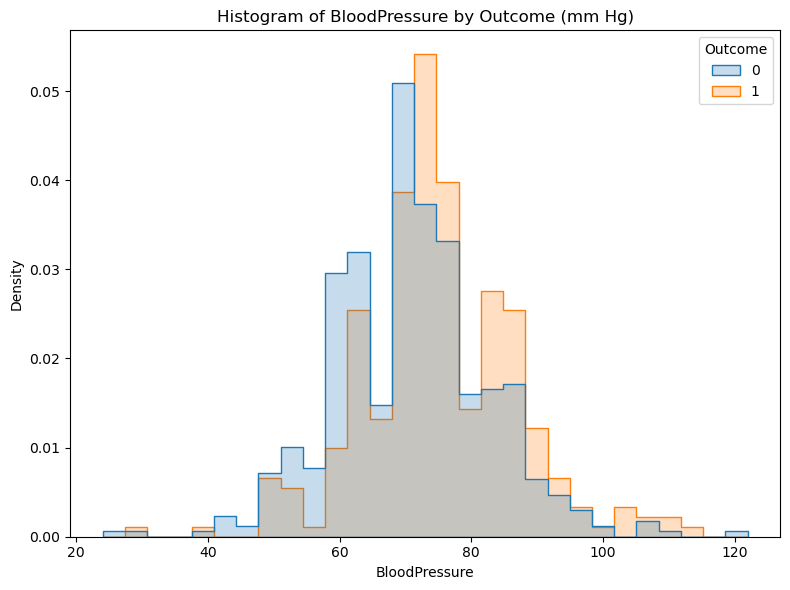

In [22]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df1, x="BloodPressure", hue="Outcome", element="step", stat="density", common_norm=False)

plt.title("Histogram of BloodPressure by Outcome (mm Hg)")
plt.tight_layout()
plt.show()

### • Skin Thickness vs Outcome

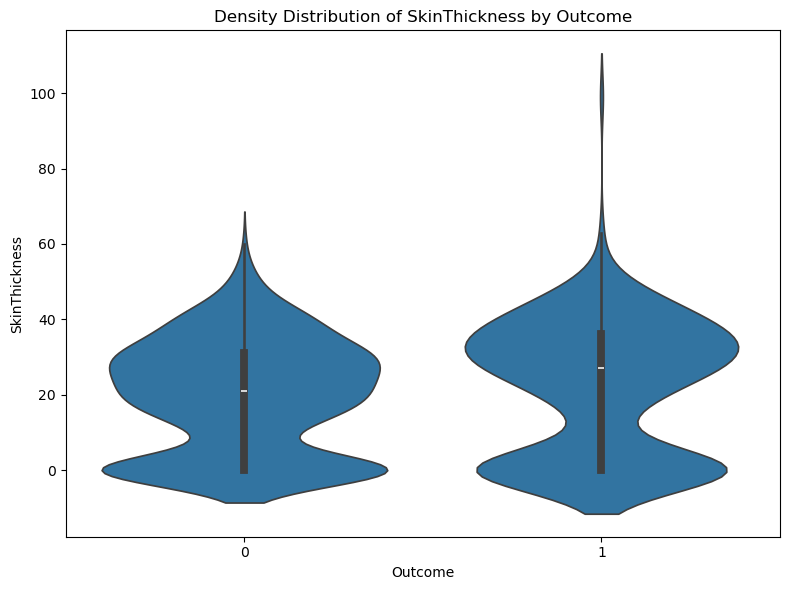

In [23]:
plt.figure(figsize=(8, 6))

sns.violinplot(x="Outcome", y="SkinThickness", data=df1)
plt.title("Density Distribution of SkinThickness by Outcome")

plt.tight_layout()
plt.show()

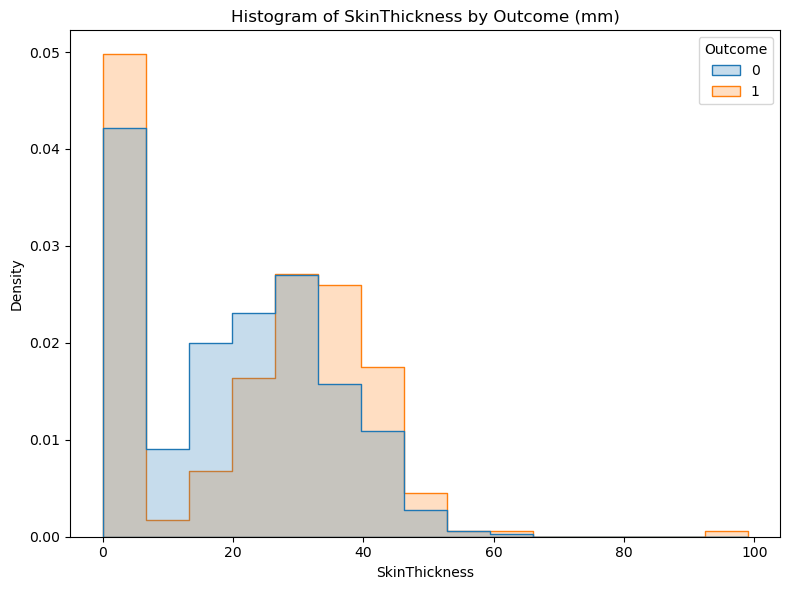

In [24]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df1, x="SkinThickness", hue="Outcome", element="step", stat="density", common_norm=False)

plt.title("Histogram of SkinThickness by Outcome (mm)")
plt.tight_layout()
plt.show()

In [25]:
df1['SkinThickness'] = df1['SkinThickness'].replace(0, np.nan)

median_values_SkinThickness = df1.groupby('Outcome')['SkinThickness'].median()

print(median_values_SkinThickness)

Outcome
0    27.0
1    32.0
Name: SkinThickness, dtype: float64


<p>→ <b>There is a positive correlation between the variables. </b>It can be observed that there are women with diabetic more likely to have high skin thickness compared to the non-diabetic women. <br>
→ Also, it can be observed that there are 0 values present in the SkinThickness column. Biologically, a skin thickness of 0 mm is impossible. This measures the triceps skinfold thickness, which must be a positive number. Same procedure, which is implemented to the previous columns will be implemented.</p>

In [26]:
df1.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
df1['SkinThickness'] = df1['SkinThickness'].fillna(df1.groupby('Outcome')['SkinThickness'].transform('median'))

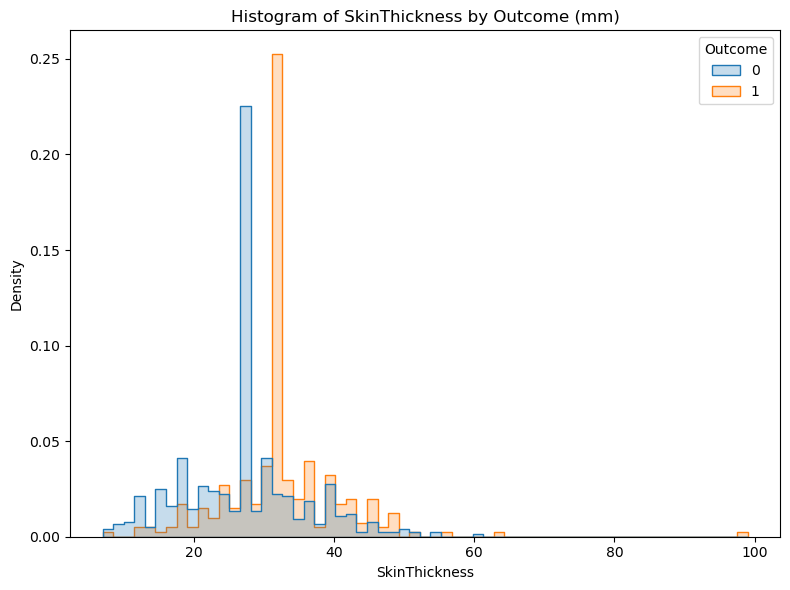

In [28]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df1, x="SkinThickness", hue="Outcome", element="step", stat="density", common_norm=False)

plt.title("Histogram of SkinThickness by Outcome (mm)")
plt.tight_layout()
plt.show()

### • Insulin vs Outcome

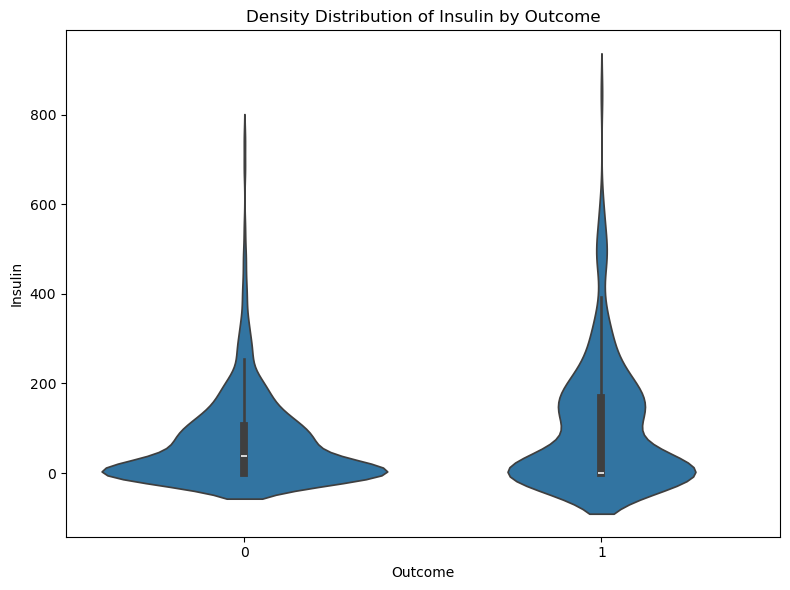

In [29]:
plt.figure(figsize=(8, 6))

sns.violinplot(x="Outcome", y="Insulin", data=df1)
plt.title("Density Distribution of Insulin by Outcome")

plt.tight_layout()
plt.show()

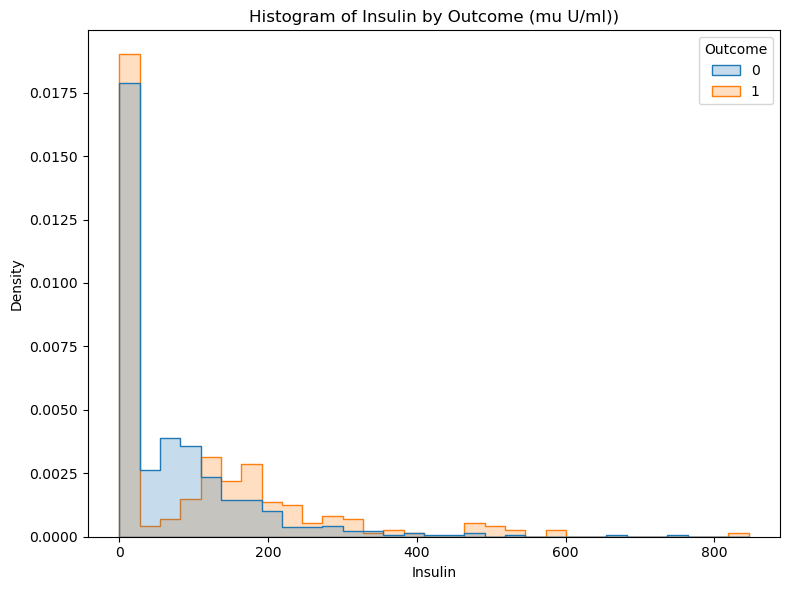

In [30]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df1, x="Insulin", hue="Outcome", element="step", stat="density", common_norm=False)

plt.title("Histogram of Insulin by Outcome (mu U/ml))")
plt.tight_layout()
plt.show()

<p>→ <b>There is a positive correlation between the variabels. </b> It can be observed that there are women with diabetic more likely to have high Insulin level compared to the non-diabetic women.<br>
→ Also, it can be observed that there are 0 values present in the Insulin column. Biologically, a Insulin level of 0 mu U/ml is impossible, which must be a positive number. Same procedure, which is implemented to the previous columns will be implemented.
</p>

In [31]:
df1['Insulin'] = df1['Insulin'].replace(0, np.nan)

median_values_Insulin = df1.groupby('Outcome')['Insulin'].median()

print(median_values_Insulin)

Outcome
0    102.5
1    169.5
Name: Insulin, dtype: float64


In [32]:
df1.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [33]:
df1['Insulin'] = df1['Insulin'].fillna(df1.groupby('Outcome')['Insulin'].transform('median'))

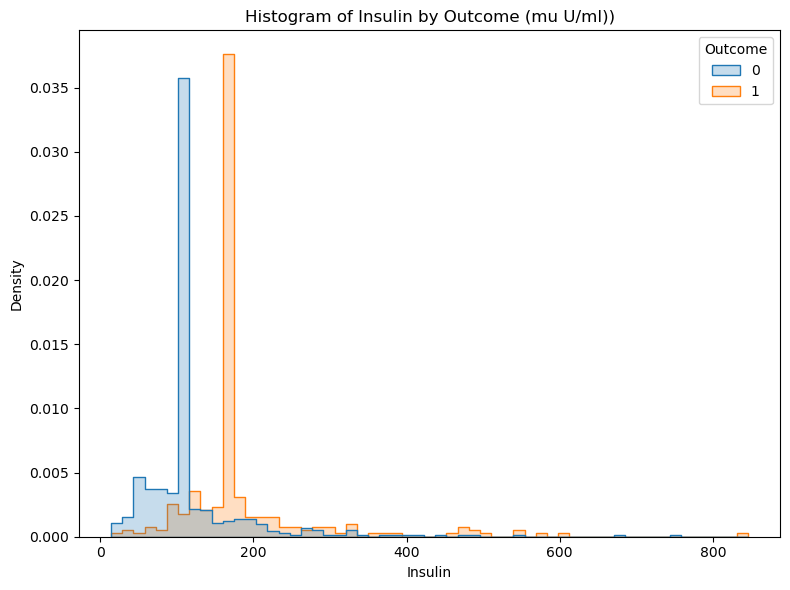

In [34]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df1, x="Insulin", hue="Outcome", element="step", stat="density", common_norm=False)

plt.title("Histogram of Insulin by Outcome (mu U/ml)")
plt.tight_layout()
plt.show()

### • BMI vs Outcome

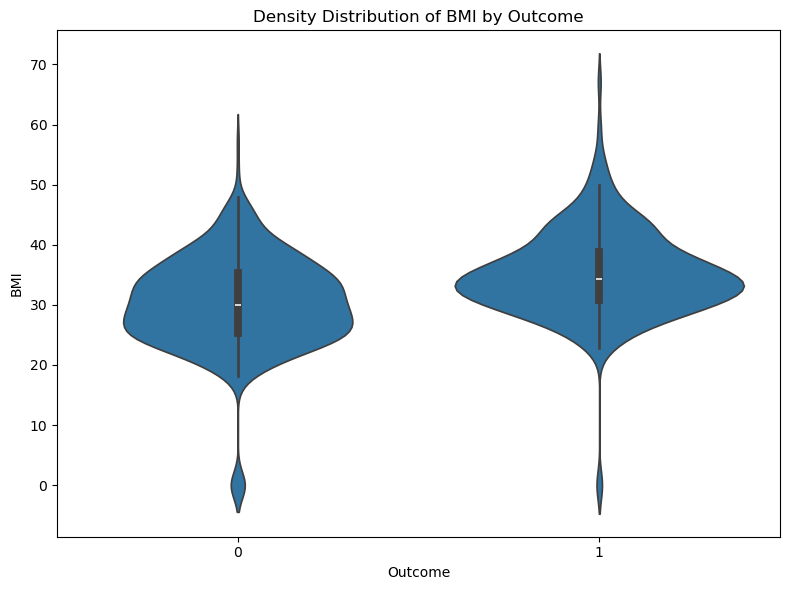

In [35]:
plt.figure(figsize=(8, 6))

sns.violinplot(x="Outcome", y="BMI", data=df1)
plt.title("Density Distribution of BMI by Outcome")

plt.tight_layout()
plt.show()

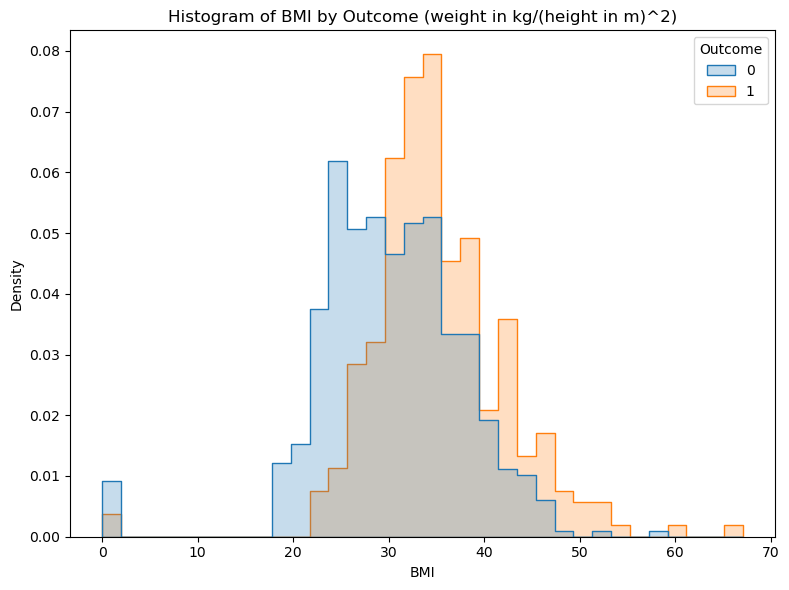

In [36]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df1, x="BMI", hue="Outcome", element="step", stat="density", common_norm=False)

plt.title("Histogram of BMI by Outcome (weight in kg/(height in m)^2)")
plt.tight_layout()
plt.show()

<p>
    → <b>There is a positive correlation between the variables.</b> It can be observed that there are women with diabetic more likely to have high BMI value compared to the non-diabetic women. <br>
    → Also, it can be observed that there are 0 values present in the BMI column. Biologically, a BMI value of 0 is impossible, which must be a positive number. Same procedure, which is implemented to the previous columns will be implemented.
</p>

In [37]:
df1['BMI'] = df1['BMI'].replace(0, np.nan)
median_values_BMI = df1.groupby('Outcome')['BMI'].median()
print(median_values_BMI)

Outcome
0    30.1
1    34.3
Name: BMI, dtype: float64


In [38]:
df1.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [39]:
df1['BMI'] = df1['BMI'].fillna(df1.groupby('Outcome')['BMI'].transform('median'))

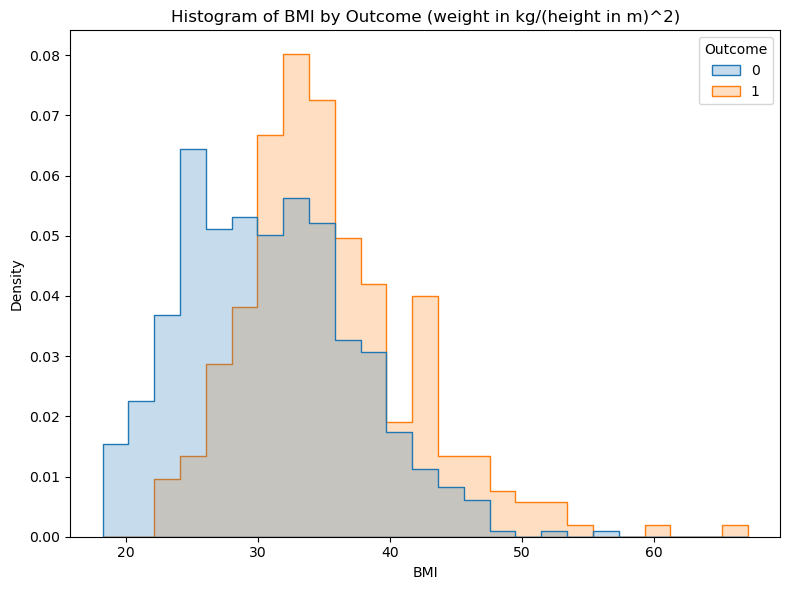

In [40]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df1, x="BMI", hue="Outcome", element="step", stat="density", common_norm=False)

plt.title("Histogram of BMI by Outcome (weight in kg/(height in m)^2)")
plt.tight_layout()
plt.show()

### • DiabetesPedigreeFunction vs Outcome

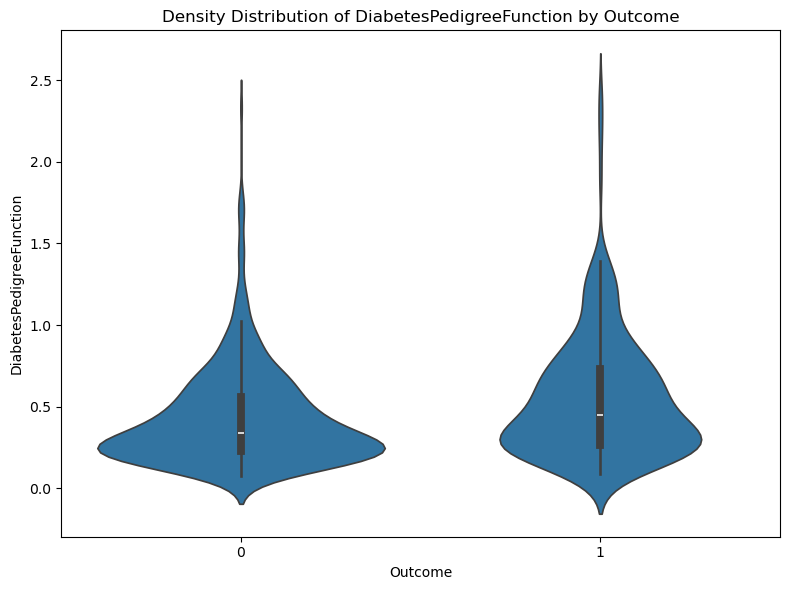

In [41]:
plt.figure(figsize=(8, 6))

sns.violinplot(x="Outcome", y="DiabetesPedigreeFunction", data=df1)
plt.title("Density Distribution of DiabetesPedigreeFunction by Outcome")

plt.tight_layout()
plt.show()

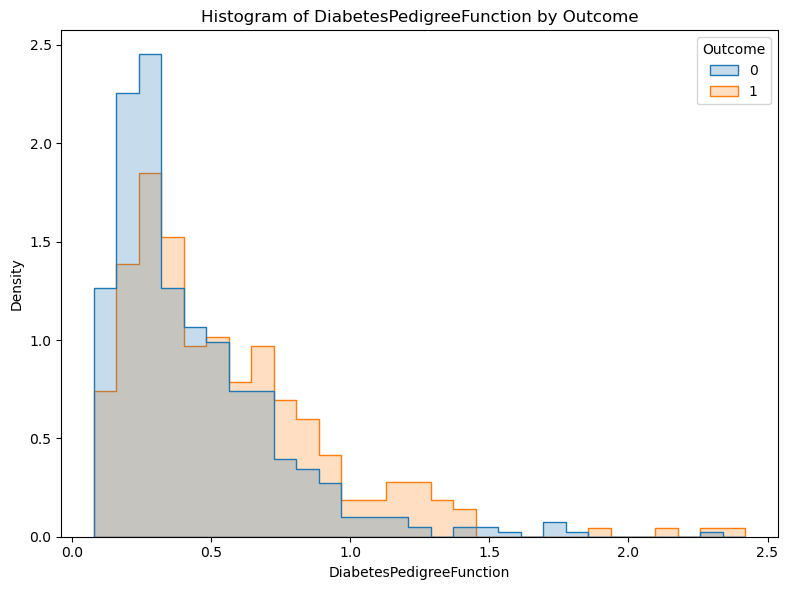

In [42]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df1, x="DiabetesPedigreeFunction", hue="Outcome", element="step", stat="density", common_norm=False)

plt.title("Histogram of DiabetesPedigreeFunction by Outcome")
plt.tight_layout()
plt.show()

In [43]:
median_values_DiabetesPedigreeFunction = df1.groupby('Outcome')['DiabetesPedigreeFunction'].median()
print(median_values_DiabetesPedigreeFunction)

Outcome
0    0.336
1    0.449
Name: DiabetesPedigreeFunction, dtype: float64


<p>
    → <b>There is a positive correlation between the variables.</b> It can be observed that there are women with diabetic more likely to have high Diabetes Pedigree Function value compared to the non-diabetic women.
</p>

### • Age vs Outcome

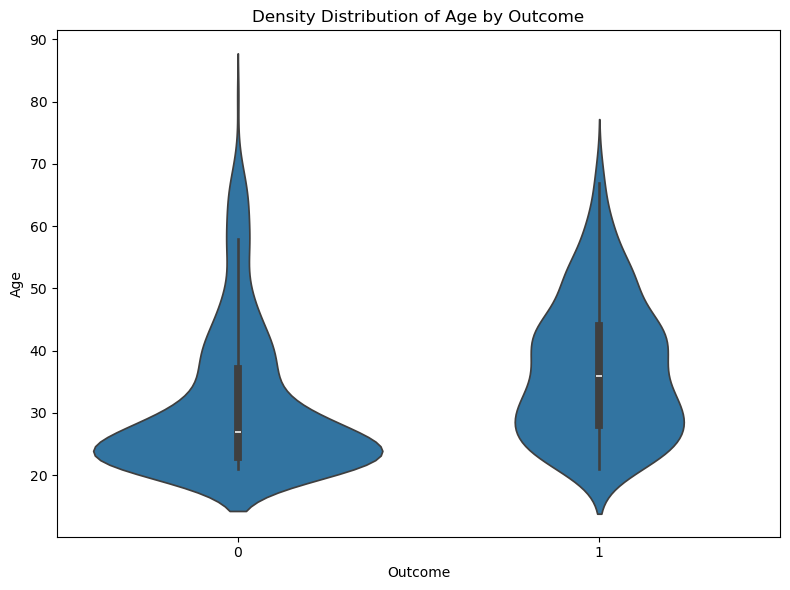

In [44]:
plt.figure(figsize=(8, 6))

sns.violinplot(x="Outcome", y="Age", data=df1)
plt.title("Density Distribution of Age by Outcome")

plt.tight_layout()
plt.show()

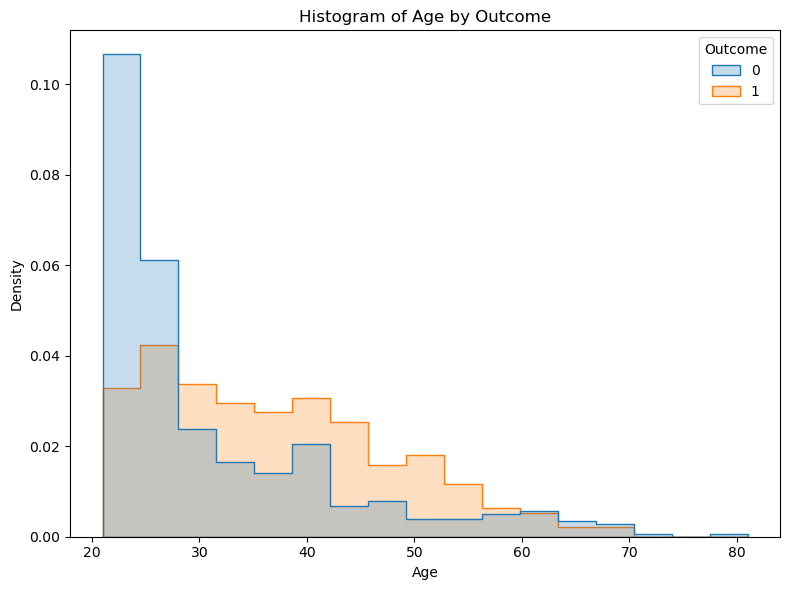

In [45]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df1, x="Age", hue="Outcome", element="step", stat="density", common_norm=False)

plt.title("Histogram of Age by Outcome")
plt.tight_layout()
plt.show()

In [46]:
median_values_Age = df1.groupby('Outcome')['Age'].median()
print(median_values_Age)

Outcome
0    27.0
1    36.0
Name: Age, dtype: float64


<p>
    → <b>There is a positive correlation between the variables.</b> It can be observed that there are women with diabetic more likely to older compared to the non-diabetic women.
</p>

<h1 style="color:yellow">Outlier Removal</h1>

<p style="color:yellow">Pregnancies</p>

In [47]:
df1.Pregnancies.describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [48]:
# Calculating Quartiles

Q1_Pregnancies = df1.Pregnancies.quantile(0.25)
Q3_Pregnancies = df1.Pregnancies.quantile(0.75)
IQR_Pregnancies = Q3_Pregnancies - Q1_Pregnancies # Interquartile Range (IQR)

l_t_Pregnancies = Q1_Pregnancies - (1.5 * IQR_Pregnancies)
u_t_Pregnancies = Q3_Pregnancies + (1.5 * IQR_Pregnancies)

print("Q1 (Lower Quartile):", Q1_Pregnancies)
print("Q3 (Upper Quartile):", Q3_Pregnancies)
print("IQR:", IQR_Pregnancies)
print("Lower Outlier Threshold:", l_t_Pregnancies)
print("Upper Outlier Threshold:", u_t_Pregnancies)

Q1 (Lower Quartile): 1.0
Q3 (Upper Quartile): 6.0
IQR: 5.0
Lower Outlier Threshold: -6.5
Upper Outlier Threshold: 13.5


In [49]:
# Outliers above the upper threshold
o_u_t_Pregnancies = df1[df1.Pregnancies > u_t_Pregnancies]

# Outliers below the lower threshold
o_l_t_Pregnancies = df1[df1.Pregnancies < l_t_Pregnancies]

# combine both
outliers_Pregnancies = df1[(df1.Pregnancies > u_t_Pregnancies) | (df1.Pregnancies < l_t_Pregnancies)]
outliers_Pregnancies

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1
455,14,175.0,62.0,30.0,169.5,33.6,0.212,38,1


<p>
    → The model needs to learn from patterns. These 4 outliers represent a very strong pattern. <b> Extreme high pregnancy counts are strongly associated with diabetes in this dataset (100% of them are diabetic). Also, these outliers are biologically possible. </b>Since, I am planning to use Random Forest Classifier which is very robust to outliers, these outliers will be kept.
</p>

<p style="color:yellow">Glucose</p>

In [50]:
df1.Glucose.describe()

count    768.000000
mean     121.677083
std       30.464161
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [51]:
Q1_Glucose = df1.Glucose.quantile(0.25)
Q3_Glucose = df1.Glucose.quantile(0.75)
IQR_Glucose = Q3_Glucose - Q1_Glucose 

l_t_Glucose = Q1_Glucose - (1.5 * IQR_Glucose)
u_t_Glucose = Q3_Glucose + (1.5 * IQR_Glucose)

print("Q1 (Lower Quartile):", Q1_Glucose)
print("Q3 (Upper Quartile):", Q3_Glucose)
print("IQR:", IQR_Glucose)
print("Lower Outlier Threshold:", l_t_Glucose)
print("Upper Outlier Threshold:", u_t_Glucose)

Q1 (Lower Quartile): 99.75
Q3 (Upper Quartile): 140.25
IQR: 40.5
Lower Outlier Threshold: 39.0
Upper Outlier Threshold: 201.0


<p>
    → Since, minimum and maximum values of Glucose columns are 33 and 199, respectively. These values don't cross the boundries of Lower Outlier Threshold or Upper Outlier Threshold. There are no Outliers presents in this column.
</p>

<p style="color:yellow">BloodPressure</p>

In [52]:
df1.BloodPressure.describe()

count    768.000000
mean      72.389323
std       12.106039
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [53]:
Q1_BloodPressure = df1.BloodPressure.quantile(0.25)
Q3_BloodPressure = df1.BloodPressure.quantile(0.75)
IQR_BloodPressure = Q3_BloodPressure - Q1_BloodPressure 

l_t_BloodPressure = Q1_BloodPressure - (1.5 * IQR_BloodPressure)
u_t_BloodPressure = Q3_BloodPressure + (1.5 * IQR_BloodPressure)

print("Q1 (Lower Quartile):", Q1_BloodPressure)
print("Q3 (Upper Quartile):", Q3_BloodPressure)
print("IQR:", IQR_BloodPressure)
print("Lower Outlier Threshold:", l_t_BloodPressure)
print("Upper Outlier Threshold:", u_t_BloodPressure)

Q1 (Lower Quartile): 64.0
Q3 (Upper Quartile): 80.0
IQR: 16.0
Lower Outlier Threshold: 40.0
Upper Outlier Threshold: 104.0


In [54]:
# Outliers above the upper threshold
o_u_t_BloodPressure = df1[df1.BloodPressure > u_t_BloodPressure]
o_u_t_BloodPressure

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
43,9,171.0,110.0,24.0,240.0,45.4,0.721,54,1
84,5,137.0,108.0,32.0,169.5,48.8,0.227,37,1
106,1,96.0,122.0,27.0,102.5,22.4,0.207,27,0
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
362,5,103.0,108.0,37.0,102.5,39.2,0.305,65,0
549,4,189.0,110.0,31.0,102.5,28.5,0.680,37,0
658,11,127.0,106.0,27.0,102.5,39.0,0.190,51,0
662,8,167.0,106.0,46.0,231.0,37.6,0.165,43,1
672,10,68.0,106.0,23.0,49.0,35.5,0.285,47,0
691,13,158.0,114.0,32.0,169.5,42.3,0.257,44,1


In [55]:
# Outliers below the lower threshold
o_l_t_BloodPressure = df1[df1.BloodPressure < l_t_BloodPressure]
o_l_t_BloodPressure

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
597,1,89.0,24.0,19.0,25.0,27.8,0.559,21,0
599,1,109.0,38.0,18.0,120.0,23.1,0.407,26,0


In [56]:
print(len(o_u_t_BloodPressure) + len(o_l_t_BloodPressure)) 

14


<p>
    → It can be observed that there are total 14 outliers presents in the Blood Pressure column. But all the outliers will not be removed. <br>
    → There are Outliers above the upper threshold which are non-diabetic women. And there is a outlier below the lower threshold which is a diabetic woman. <br>
    → Those outliers will be removed because to improve the model performance. Women with Higher Blood Pressure have a high chance of having diabetes and women with lower blood pressure have a high chance of not having diabetes.  
</p>

In [57]:
df2 = df1.drop([106, 362, 549, 658, 672, 125])
df2.shape

(762, 9)

<p style="color:yellow">SkinThickness</p>

In [58]:
df2.SkinThickness.describe()

count    762.000000
mean      29.073491
std        8.905245
min        7.000000
25%       25.000000
50%       28.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [59]:
Q1_SkinThickness = df2.SkinThickness.quantile(0.25)
Q3_SkinThickness = df2.SkinThickness.quantile(0.75)
IQR_SkinThickness = Q3_SkinThickness - Q1_SkinThickness 

l_t_SkinThickness = Q1_SkinThickness - (1.5 * IQR_SkinThickness)
u_t_SkinThickness = Q3_SkinThickness + (1.5 * IQR_SkinThickness)

print("Q1 (Lower Quartile):", Q1_SkinThickness)
print("Q3 (Upper Quartile):", Q3_SkinThickness)
print("IQR:", IQR_SkinThickness)
print("Lower Outlier Threshold:", l_t_SkinThickness)
print("Upper Outlier Threshold:", u_t_SkinThickness)

Q1 (Lower Quartile): 25.0
Q3 (Upper Quartile): 32.0
IQR: 7.0
Lower Outlier Threshold: 14.5
Upper Outlier Threshold: 42.5


In [60]:
# Outliers above the upper threshold
o_u_t_SkinThickness = df2[df2.SkinThickness > u_t_SkinThickness]
o_u_t_SkinThickness

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
39,4,111.0,72.0,47.0,207.0,37.1,1.390,56,1
57,0,100.0,88.0,60.0,110.0,46.8,0.962,31,0
86,13,106.0,72.0,54.0,102.5,36.6,0.178,45,0
99,1,122.0,90.0,51.0,220.0,49.7,0.325,31,1
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
150,1,136.0,74.0,50.0,204.0,37.4,0.399,24,0
155,7,152.0,88.0,44.0,169.5,50.0,0.337,36,1
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1


In [61]:
# Outliers below the lower threshold
o_l_t_SkinThickness = df2[df2.SkinThickness < l_t_SkinThickness]
o_l_t_SkinThickness

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
32,3,88.0,58.0,11.0,54.0,24.8,0.267,22,0
50,1,103.0,80.0,11.0,82.0,19.4,0.491,22,0
55,1,73.0,50.0,10.0,102.5,23.0,0.248,21,0
68,1,95.0,66.0,13.0,38.0,19.6,0.334,25,0
80,3,113.0,44.0,13.0,102.5,22.4,0.140,22,0
130,4,173.0,70.0,14.0,168.0,29.7,0.361,33,1
134,2,96.0,68.0,13.0,49.0,21.1,0.647,26,0
169,3,111.0,90.0,12.0,78.0,28.4,0.495,29,0
197,3,107.0,62.0,13.0,48.0,22.9,0.678,23,1
252,2,90.0,80.0,14.0,55.0,24.4,0.249,24,0


In [62]:
print(len(o_u_t_SkinThickness) + len(o_l_t_SkinThickness))

87


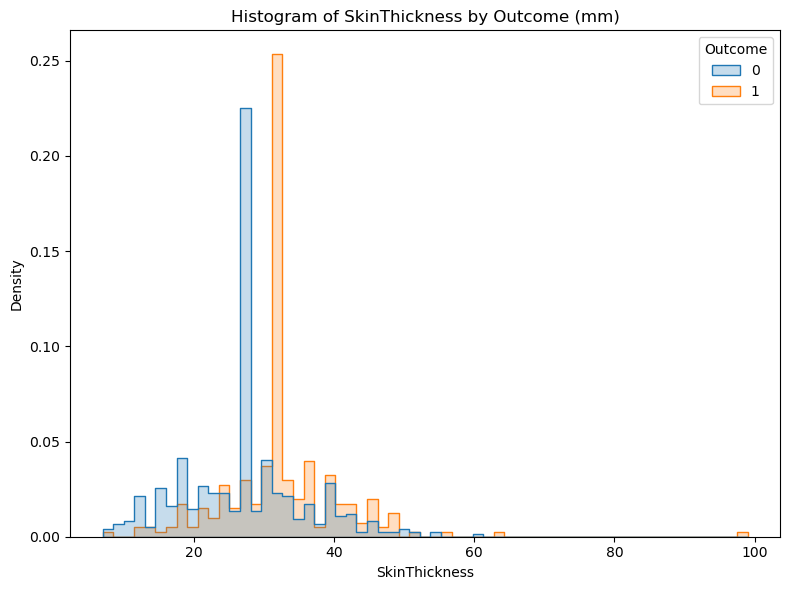

In [63]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df2, x="SkinThickness", hue="Outcome", element="step", stat="density", common_norm=False)

plt.title("Histogram of SkinThickness by Outcome (mm)")
plt.tight_layout()
plt.show()

<p>
    → There are 87 outliers present in the Skin Thickness column. This is a large number of outliers compared to the records in the dataset. <br>
    → The reason is, earlier Skin Thickness column had 227 total 0 values. Biologically, it's not possible. So, they are replaced by median values of each responsible outcomes. This caused to have a spike in the middle of the values: 27 and 32 vaulues. This results a considerable of amount of values to fall as outliers. <br>
    → Because of the above reason, only selected outliers will be removed. <br>
    → Diabetic records which falls below Lower Outlier Threshold and non-diabetic records which falls above Upper Outlier Threshold. Alos, there is a very extreme value which is 99 mm. These values will be removed. 
</p>

In [64]:
# implementing the conditions

condition_1_st = (df2["Outcome"] == 1) & (df2["SkinThickness"] < l_t_SkinThickness)
condition_2_st = (df2["Outcome"] == 0) & (df2["SkinThickness"] > u_t_SkinThickness)
condition_3_st = (df2["SkinThickness"] == 99)

In [65]:
df3 = df2[~(condition_1_st | condition_2_st | condition_3_st)]
df3.shape

(732, 9)

<p style="color:yellow">Insulin</p>

In [66]:
df3.Insulin.describe()

count    732.000000
mean     141.993169
std       89.022780
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin, dtype: float64

In [67]:
Q1_Insulin = df3.Insulin.quantile(0.25)
Q3_Insulin = df3.Insulin.quantile(0.75)
IQR_Insulin = Q3_Insulin - Q1_Insulin 

l_t_Insulin = Q1_Insulin - (1.5 * IQR_Insulin)
u_t_Insulin = Q3_Insulin + (1.5 * IQR_Insulin)

print("Q1 (Lower Quartile):", Q1_Insulin)
print("Q3 (Upper Quartile):", Q3_Insulin)
print("IQR:", IQR_Insulin)
print("Lower Outlier Threshold:", l_t_Insulin)
print("Upper Outlier Threshold:", u_t_Insulin)

Q1 (Lower Quartile): 102.5
Q3 (Upper Quartile): 169.5
IQR: 67.0
Lower Outlier Threshold: 2.0
Upper Outlier Threshold: 270.0


In [68]:
# Outliers above the upper threshold
o_u_t_Insulin = df3[df3.Insulin > u_t_Insulin]
o_u_t_Insulin

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
53,8,176.0,90.0,34.0,300.0,33.7,0.467,58,1
54,7,150.0,66.0,42.0,342.0,34.7,0.718,42,0
56,7,187.0,68.0,39.0,304.0,37.7,0.254,41,1
111,8,155.0,62.0,26.0,495.0,34.0,0.543,46,1
139,5,105.0,72.0,29.0,325.0,36.9,0.159,28,0
144,4,154.0,62.0,31.0,284.0,32.8,0.237,23,0
153,1,153.0,82.0,42.0,485.0,40.6,0.687,23,0
162,0,114.0,80.0,34.0,285.0,44.2,0.167,27,0


In [69]:
# Outliers below the lower threshold
o_l_t_Insulin = df3[df3.Insulin < l_t_Insulin]
o_l_t_Insulin

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [70]:
print(len(o_u_t_Insulin) + len(o_l_t_Insulin))

50


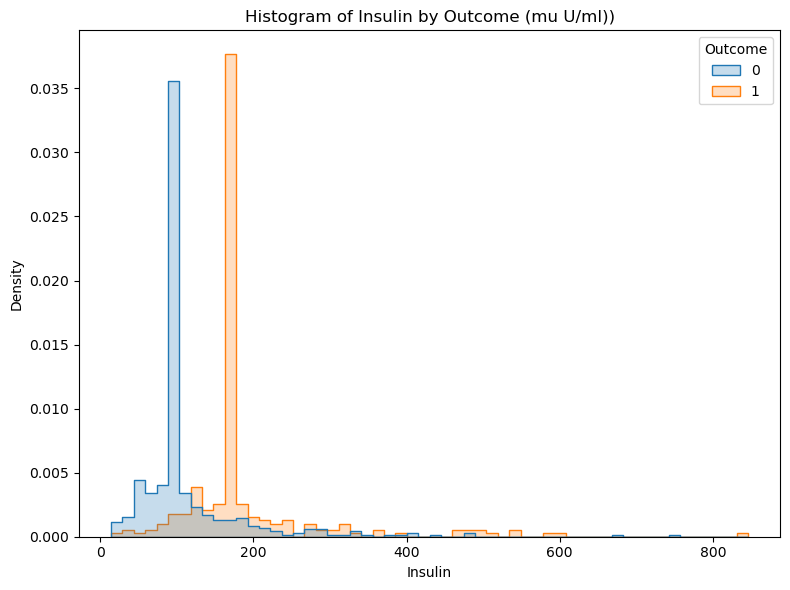

In [71]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df3, x="Insulin", hue="Outcome", element="step", stat="density", common_norm=False)

plt.title("Histogram of Insulin by Outcome (mu U/ml))")
plt.tight_layout()
plt.show()

<p>
    → There are 50 outliers present in the Insulin column. This is a considerable amount of outliers compared to the records in the dataset. <br>
    → The reason is same as previously mention in the Skin Thickness column. Because of that reason only selected outliers will be removed. <br>
    → Non-diabetes records which are falls above Upper Outlier Threshold and the max value (846) will be removed. 
</p>

In [72]:
# implementing the conditions

condition_1_in = (df3["Outcome"] == 0) & (df3["Insulin"] > u_t_Insulin)
condition_2_in = (df3["Insulin"] == 846)

In [73]:
df4 = df3[~(condition_1_in | condition_2_in)]
df4.shape

(709, 9)

<p style="color:yellow">BMI</p>

In [74]:
df4.BMI.describe()

count    709.000000
mean      32.182370
std        6.821039
min       18.200000
25%       27.400000
50%       31.900000
75%       36.100000
max       67.100000
Name: BMI, dtype: float64

In [75]:
Q1_BMI = df4.BMI.quantile(0.25)
Q3_BMI = df4.BMI.quantile(0.75)
IQR_BMI = Q3_BMI - Q1_BMI

l_t_BMI = Q1_BMI - (1.5 * IQR_BMI)
u_t_BMI = Q3_BMI + (1.5 * IQR_BMI)

print("Q1 (Lower Quartile):", Q1_BMI)
print("Q3 (Upper Quartile):", Q3_BMI)
print("IQR:", IQR_BMI)
print("Lower Outlier Threshold:", l_t_BMI)
print("Upper Outlier Threshold:", u_t_BMI)

Q1 (Lower Quartile): 27.4
Q3 (Upper Quartile): 36.1
IQR: 8.700000000000003
Lower Outlier Threshold: 14.349999999999994
Upper Outlier Threshold: 49.150000000000006


In [76]:
# Outliers above the upper threshold
o_u_t_BMI = df4[df4.BMI > u_t_BMI]
o_u_t_BMI

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
99,1,122.0,90.0,51.0,220.0,49.7,0.325,31,1
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
155,7,152.0,88.0,44.0,169.5,50.0,0.337,36,1
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
193,11,135.0,74.5,32.0,169.5,52.3,0.578,40,1
303,5,115.0,98.0,32.0,169.5,52.9,0.209,28,1
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
673,3,123.0,100.0,35.0,240.0,57.3,0.880,22,0
681,0,162.0,76.0,36.0,169.5,49.6,0.364,26,1
746,1,147.0,94.0,41.0,169.5,49.3,0.358,27,1


In [77]:
# Outliers below the lower threshold
o_l_t_BMI = df4[df4.BMI < l_t_BMI]
o_l_t_BMI

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [78]:
print(len(o_u_t_BMI) + len(o_l_t_BMI))

10


<p>
    → There are 10 outliers present in the BMI column. <br>
    → Only outliers which are non-diabetes above the threshhold will be removed. <br>
    → Other outliers will be kept because to maximize the performance of the model and to keep as much as records as possible.
</p>

In [79]:
df5 = df4.drop([673])
df5.shape

(708, 9)

<p style="color:yellow">DiabetesPedigreeFunction</p>

In [80]:
df5.DiabetesPedigreeFunction.describe()

count    708.000000
mean       0.467376
std        0.326838
min        0.078000
25%        0.239750
50%        0.367000
75%        0.613250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [81]:
Q1_DiabetesPedigreeFunction = df5.DiabetesPedigreeFunction.quantile(0.25)
Q3_DiabetesPedigreeFunction = df5.DiabetesPedigreeFunction.quantile(0.75)
IQR_DiabetesPedigreeFunction = Q3_DiabetesPedigreeFunction - Q1_DiabetesPedigreeFunction

l_t_DiabetesPedigreeFunction = Q1_DiabetesPedigreeFunction - (1.5 * IQR_DiabetesPedigreeFunction)
u_t_DiabetesPedigreeFunction = Q3_DiabetesPedigreeFunction + (1.5 * IQR_DiabetesPedigreeFunction)

print("Q1 (Lower Quartile):", Q1_DiabetesPedigreeFunction)
print("Q3 (Upper Quartile):", Q3_DiabetesPedigreeFunction)
print("IQR:", IQR_DiabetesPedigreeFunction)
print("Lower Outlier Threshold:", l_t_DiabetesPedigreeFunction)
print("Upper Outlier Threshold:", u_t_DiabetesPedigreeFunction)

Q1 (Lower Quartile): 0.23975
Q3 (Upper Quartile): 0.61325
IQR: 0.37349999999999994
Lower Outlier Threshold: -0.3204999999999999
Upper Outlier Threshold: 1.1734999999999998


In [82]:
# Outliers above the upper threshold
o_u_t_DiabetesPedigreeFunction = df5[df5.DiabetesPedigreeFunction > u_t_DiabetesPedigreeFunction]
o_u_t_DiabetesPedigreeFunction

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
12,10,139.0,80.0,27.0,102.5,27.1,1.441,57,0
39,4,111.0,72.0,47.0,207.0,37.1,1.390,56,1
45,0,180.0,66.0,39.0,169.5,42.0,1.893,25,1
58,0,146.0,82.0,27.0,102.5,40.5,1.781,44,0
100,1,163.0,72.0,32.0,169.5,39.0,1.222,33,1
147,2,106.0,64.0,35.0,119.0,30.5,1.400,34,0
152,9,156.0,86.0,28.0,155.0,34.3,1.189,42,1
187,1,128.0,98.0,41.0,58.0,32.0,1.321,33,1
218,5,85.0,74.0,22.0,169.5,29.0,1.224,32,1


In [83]:
# Outliers below the lower threshold
o_l_t_DiabetesPedigreeFunction = df5[df5.DiabetesPedigreeFunction < l_t_DiabetesPedigreeFunction]
o_l_t_DiabetesPedigreeFunction

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [84]:
print(len(o_u_t_DiabetesPedigreeFunction) + len(o_l_t_DiabetesPedigreeFunction))

31


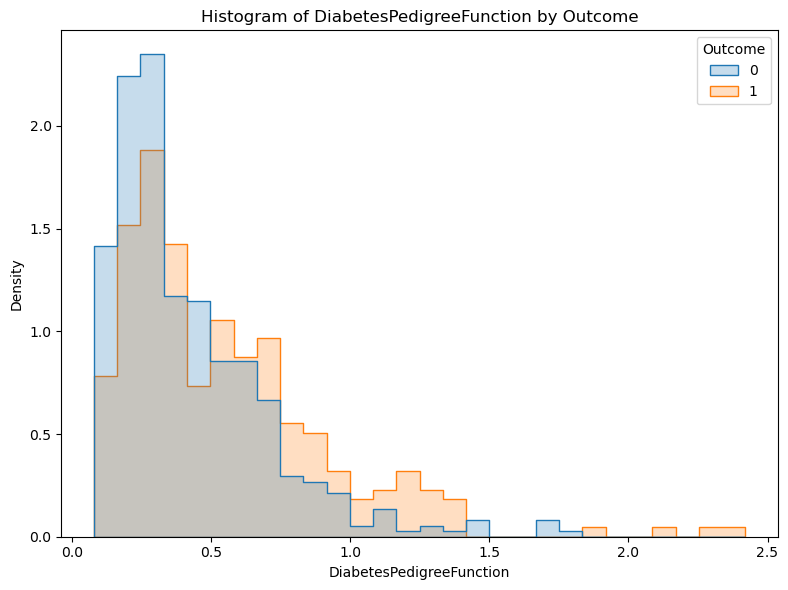

In [85]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df5, x="DiabetesPedigreeFunction", hue="Outcome", element="step", stat="density", common_norm=False)

plt.title("Histogram of DiabetesPedigreeFunction by Outcome")
plt.tight_layout()
plt.show()

<p>
    → There are total 31 outliers in the DiabetesPedigreeFunction column. <br>
    → Only selected outliers will be removed. <br>
    → Non-diabetes records which are falls above upper outlier threshold (1.17) and diabetes records which are falls above 1.5 will be removed. 
</p>

In [86]:
# implementing the conditions

condition_1_DiabetesPedigreeFunction = (df5["Outcome"] == 0) & (df5["DiabetesPedigreeFunction"] > u_t_DiabetesPedigreeFunction)
condition_2_DiabetesPedigreeFunction = (df5["DiabetesPedigreeFunction"] > 1.5)

In [87]:
df6 = df5[~(condition_1_DiabetesPedigreeFunction | condition_2_DiabetesPedigreeFunction)]
df6.shape

(693, 9)

<p style="color:yellow">Age</p>

In [88]:
df6.Age.describe()

count    693.000000
mean      33.383838
std       11.774734
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [89]:
Q1_Age = df6.Age.quantile(0.25)
Q3_Age = df6.Age.quantile(0.75)
IQR_Age = Q3_Age - Q1_Age 

l_t_Age = Q1_Age - (1.5 * IQR_Age)
u_t_Age = Q3_Age + (1.5 * IQR_Age)

print("Q1 (Lower Quartile):", Q1_Age)
print("Q3 (Upper Quartile):", Q3_Age)
print("IQR:", IQR_Age)
print("Lower Outlier Threshold:", l_t_Age)
print("Upper Outlier Threshold:", u_t_Age)

Q1 (Lower Quartile): 24.0
Q3 (Upper Quartile): 41.0
IQR: 17.0
Lower Outlier Threshold: -1.5
Upper Outlier Threshold: 66.5


In [90]:
# Outliers above the upper threshold
o_u_t_Age = df6[df6.Age > u_t_Age]
o_u_t_Age

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132.0,80.0,27.0,102.5,26.8,0.186,69,0
363,4,146.0,78.0,32.0,169.5,38.5,0.520,67,1
453,2,119.0,70.0,27.0,102.5,19.6,0.832,72,0
459,9,134.0,74.0,33.0,60.0,25.9,0.460,81,0
489,8,194.0,80.0,27.0,102.5,26.1,0.551,67,0
537,0,57.0,60.0,27.0,102.5,21.7,0.735,67,0
666,4,145.0,82.0,18.0,169.5,32.5,0.235,70,1
674,8,91.0,82.0,27.0,102.5,35.6,0.587,68,0
684,5,136.0,82.0,27.0,102.5,30.1,0.640,69,0


In [91]:
# Outliers below the lower threshold
o_l_t_Age = df6[df6.Age < l_t_Age]
o_l_t_Age

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [92]:
print(len(o_u_t_Age) + len(o_l_t_Age))

9


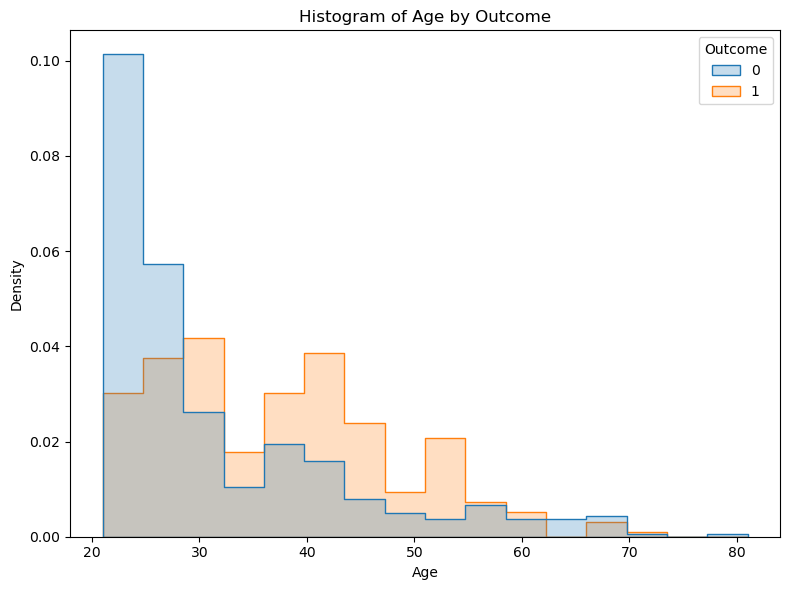

In [93]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df6, x="Age", hue="Outcome", element="step", stat="density", common_norm=False)

plt.title("Histogram of Age by Outcome")
plt.tight_layout()
plt.show()

<p>
    → There are 9 outliers present in the Age column. Only selected outliers will be removed. <br>
    → Only non-diabetes records whcih are falls above upper outlier threshold will be removed.
</p>

In [94]:
# Keep only rows that do NOT satisfy the condition
df7 = df6.loc[~((df6["Age"] > u_t_Age) & (df6["Outcome"] == 0))]
df7.shape

(686, 9)

In [95]:
df7.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0


<h1 style="color:yellow"> Building the Model</h1>

In [96]:
X = df7.drop(["Outcome"], axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30


In [97]:
y = df7.Outcome
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

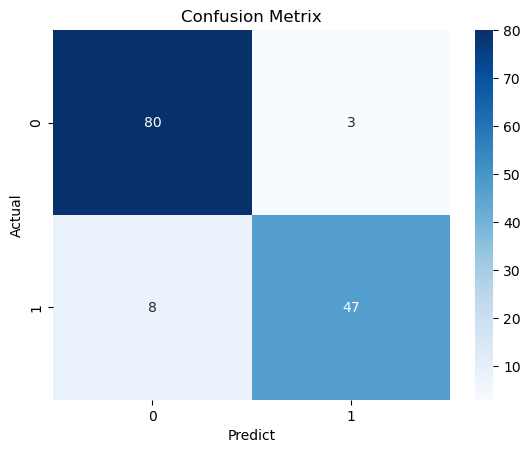

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        83
           1       0.94      0.85      0.90        55

    accuracy                           0.92       138
   macro avg       0.92      0.91      0.92       138
weighted avg       0.92      0.92      0.92       138



In [122]:
# confusion metric
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Metrix')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

# classification report
print(classification_report(y_test, y_pred))

<h1 style="color:yellow">Export the model to a pickle file</h1>

In [123]:
import pickle
with open("Pima_Indians_Diabetes_model.pickle","wb") as f:
    pickle.dump(model, f)